# Data manipulation

## Preparing the dataset

In [1]:
# defining path and CMU Book Summary Dataset dataset URL
DATA_DIR = '../data/'
DS_URL = 'https://www.cs.cmu.edu/~dbamman/data/booksummaries.tar.gz'

In [2]:
# downloading the CMU-BSD
import urllib.request
import tarfile
import json
import os

os.chdir(DATA_DIR)
urllib.request.urlretrieve(DS_URL, 'booksummaries.tar.gz')
targzf = tarfile.open('booksummaries.tar.gz')
targzf.extractall('.')
targzf.close()
os.remove('booksummaries.tar.gz')

In [4]:
# loading the downloaded dataset
os.chdir('booksummaries')
txtfile = open('booksummaries.txt')

wiki_ids, frbs_ids, names, authors, dates, genres, summaries = [], [], [], [], [], [], []

for line in txtfile.readlines():
    entry = line.split('\t')
    wiki_ids.append(entry[0])
    frbs_ids.append(entry[1])
    names.append(entry[2])
    authors.append(entry[3])
    dates.append(entry[4])
    if entry[5].strip() != '': genres.append(list(json.loads(entry[5]).values()))
    else: genres.append([])
    summaries.append(entry[6].strip())

txtfile.close()

In [5]:
# conversion to csv
import pandas as pd
import shutil

dataset = pd.DataFrame({'wiki_id': wiki_ids, 'frbs_id': frbs_ids, 'name': names,
                        'author': authors, 'date': dates, 'genres': genres, 'summary': summaries})

os.chdir('..')
dataset.to_csv('dataset.csv')
shutil.rmtree("booksummaries")

## Visualisation

In [8]:
import ast
import pandas as pd

# reading the dataset 
df = pd.read_csv('../data/dataset_filtered_labels.csv')

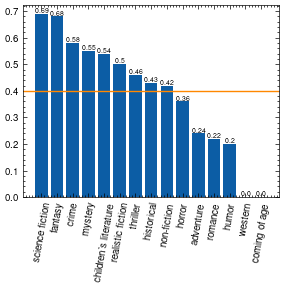

In [15]:
import matplotlib.pyplot as plt
plt.style.use(['./science.mplstyle', './nature.mplstyle'])

genres = ['non-fiction', 'children\'s literature', 'historical', 'crime', 'science fiction', 
          'mystery', 'fantasy', 'coming of age', 'humor', 'thriller', 'romance',
          'realistic fiction', 'horror', 'adventure', 'western']
f1_scores = [.42, .54, .43, .58, .69, .55, .68, .00, .2, .46, .22, .5, .36, .24, .00]
f1_scores, genres = zip(*sorted(zip(f1_scores, genres), reverse=True))

fig, ax = plt.subplots()
bars = ax.bar(
    x=genres,
    height=f1_scores
)
ax.axhline(y=0.4, color='#FF8800', linestyle='-')

plt.xticks(rotation=80)

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + .005,
      bar.get_height(),
      horizontalalignment='center',
      size=5,
      weight='bold'
  )
fig.savefig('../gfx/genref1scores.jpg', dpi=300)

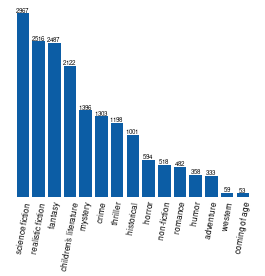

In [39]:
genre_freq= {}
for genre in genres:
    for index, genres_list in df['genres'].items():
        genre_count = genres_list.count(genre)
        if genre not in genre_freq:
            genre_freq[genre] = genre_count
        else:
            genre_freq[genre] = genre_freq.get(genre) + genre_count

ybar = [genre_freq[k] for k in genres]
ybar, genres = zip(*sorted(zip(ybar, genres), reverse=True))

fig, ax = plt.subplots()
bars = ax.bar(
    x=genres,
    height=ybar
)

plt.xticks(rotation=80)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0, labelsize=6)
ax.get_yaxis().set_ticks([])

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 25,
      bar.get_height(),
      horizontalalignment='center',
      size=4.5,
      weight='bold'
  )
fig.savefig('../gfx/genrecounts.jpg', dpi=300)